# Theory Questions



1. What is unsupervised learning in the context of machine learning?

Unsupervised learning is a type of machine learning where the algorithm learns patterns from data without labeled outputs. It is primarily used for clustering, association, and dimensionality reduction.

2. How does K-Means clustering algorithm work?

K-Means works by:

Randomly selecting k centroids.

Assigning each data point to the nearest centroid.

Updating centroids based on the mean of assigned points.

Repeating steps 2 and 3 until assignments stop changing or reach a max number of iterations.

3. Explain the concept of a dendrogram in hierarchical clustering.

A dendrogram is a tree-like diagram that shows the merging or splitting of clusters at different levels in hierarchical clustering. The height of each merge reflects the distance or dissimilarity between clusters.

4. What is the main difference between K-Means and Hierarchical Clustering?

K-Means requires specifying the number of clusters (k) and is iterative.

Hierarchical Clustering builds a tree structure and does not require k upfront.

5. What are the advantages of DBSCAN over K-Means?

Does not require the number of clusters in advance.

Can find arbitrarily shaped clusters.

Can identify and separate noise/outliers.

6. When would you use Silhouette Score in clustering?

Use Silhouette Score to evaluate the quality of clustering:

Ranges from -1 to 1.

Higher values mean better-defined and more cohesive clusters.

7. What are the limitations of Hierarchical Clustering?

Computationally expensive for large datasets (time complexity is O(n²)).

Not flexible; once merged or split, decisions cannot be undone.

Sensitive to outliers and noise.

8. Why is feature scaling important in clustering algorithms like K-Means?

K-Means uses Euclidean distance, which is sensitive to feature magnitudes. Unscaled features can dominate, leading to biased clustering.

9. How does DBSCAN identify noise points?
Noise points are those that:

Do not have enough neighbors (less than minPts) within the eps radius.

Are not density-reachable from any core point.

10. Define inertia in the context of K-Means.

Inertia is the sum of squared distances of samples to their closest centroid. It measures compactness of clusters—lower is better.

11. What is the elbow method in K-Means clustering?

A method to determine optimal k by:

Plotting inertia vs. number of clusters.

Looking for a point where the rate of decrease sharply changes — the "elbow".

12. Describe the concept of "density" in DBSCAN.

Density is based on:

The number of points (minPts) within a specified radius (eps).

A point is a core point if it has sufficient density around it.

13. Can hierarchical clustering be used on categorical data?

Yes, but you need to:

Use appropriate distance measures (e.g., Hamming, Jaccard).

Choose suitable linkage methods that work with categorical data.

14. What does a negative Silhouette Score indicate?

It means the sample may be closer to a neighboring cluster than to its own — suggesting poor clustering or misassignment.

15. Explain the term "linkage criteria" in hierarchical clustering.

Linkage criteria determine how distances between clusters are calculated:

Single linkage: min distance between points.

Complete linkage: max distance.

Average linkage: mean distance.

Ward’s linkage: minimizes variance within clusters.

16. Why might K-Means clustering perform poorly on data with varying cluster sizes or densities?

K-Means assumes:

Clusters are spherical and equally sized.

It struggles with non-uniform densities, leading to misclustered points.

17. What are the core parameters in DBSCAN, and how do they influence clustering?

eps: Radius for neighborhood search.

minPts: Minimum number of points to form a dense region. They control what defines a core point, border point, or noise.

18. How does K-Means++ improve upon standard K-Means initialization?

K-Means++:

Selects initial centroids more strategically by spreading them out.

Reduces the chances of poor clustering and improves convergence.

19. What is agglomerative clustering?

A bottom-up hierarchical clustering approach:

Each data point starts as its own cluster.

Clusters are merged iteratively based on similarity until one big cluster remains or a stopping condition is met.

20. What makes Silhouette Score a better metric than just inertia for model evaluation?

Silhouette Score evaluates:

Cohesion (intra-cluster distance) and separation (inter-cluster distance). Whereas inertia only considers compactness, Silhouette gives a balanced quality measure.



# Practical Questions:

1. Generate synthetic data with 4 centers using make_blobs and apply K-Means clustering. Visualize using a scatter plot

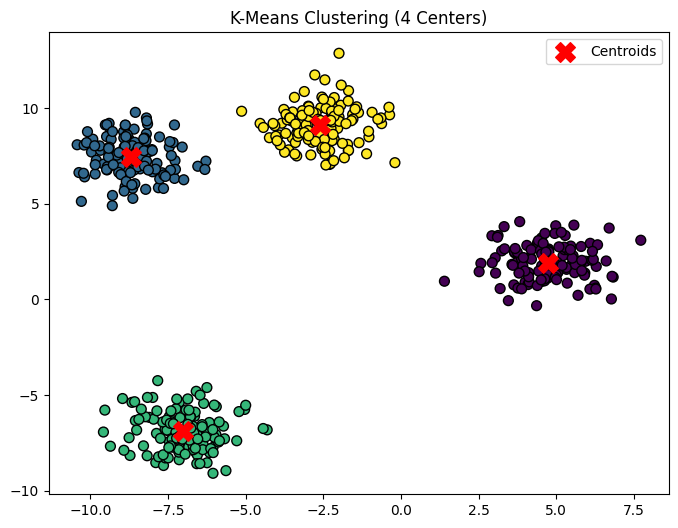

In [2]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Generate synthetic data
X, y = make_blobs(n_samples=500, centers=4, cluster_std=1.0, random_state=42)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(X)
centers = kmeans.cluster_centers_

# Plot the results
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', edgecolor='k', s=50)
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title("K-Means Clustering (4 Centers)")
plt.legend()
plt.show()

2. Load the Iris dataset and use Agglomerative Clustering to group the data into 3 clusters. Display the first 10 predicted labels


In [3]:
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering

# Load Iris dataset
iris = load_iris()
X = iris.data

# Apply Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=3, linkage='ward')
labels = agglo.fit_predict(X)

# Show first 10 predicted labels
print("First 10 predicted labels:", labels[:10])


First 10 predicted labels: [1 1 1 1 1 1 1 1 1 1]


3. Generate synthetic data using make_moons and apply DBSCAN. Highlight outliers in the plot

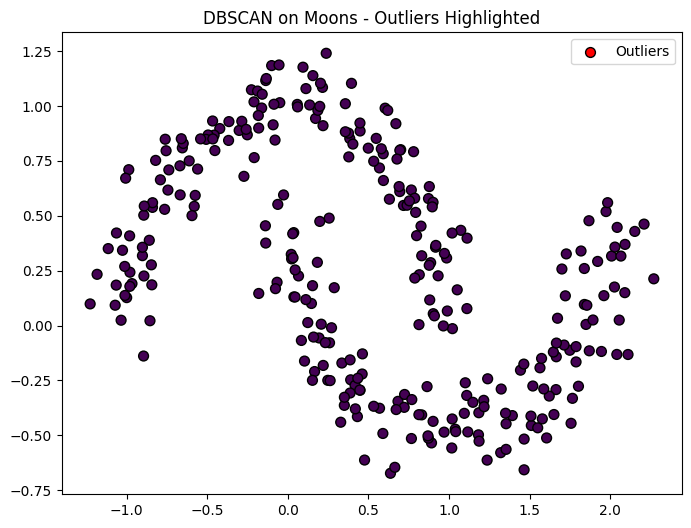

In [4]:
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# Generate moon-shaped synthetic data
X, _ = make_moons(n_samples=300, noise=0.1, random_state=42)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=5)
labels = dbscan.fit_predict(X)

# Identify core, border, and noise
outliers = labels == -1

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(X[~outliers, 0], X[~outliers, 1], c=labels[~outliers], cmap='viridis', edgecolor='k', s=50)
plt.scatter(X[outliers, 0], X[outliers, 1], c='red', label='Outliers', edgecolor='k', s=50)
plt.title("DBSCAN on Moons - Outliers Highlighted")
plt.legend()
plt.show()


 4. Load the Wine dataset and apply K-Means clustering after standardizing the features. Print the size of each cluster

In [5]:
from sklearn.datasets import load_wine
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np

# Load Wine dataset
wine = load_wine()
X = wine.data

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X_scaled)

# Print size of each cluster
unique, counts = np.unique(labels, return_counts=True)
print("Cluster sizes:")
for label, count in zip(unique, counts):
    print(f"Cluster {label}: {count} samples")


Cluster sizes:
Cluster 0: 65 samples
Cluster 1: 51 samples
Cluster 2: 62 samples


5. Use make_circles to generate synthetic data and cluster it using DBSCAN. Plot the result

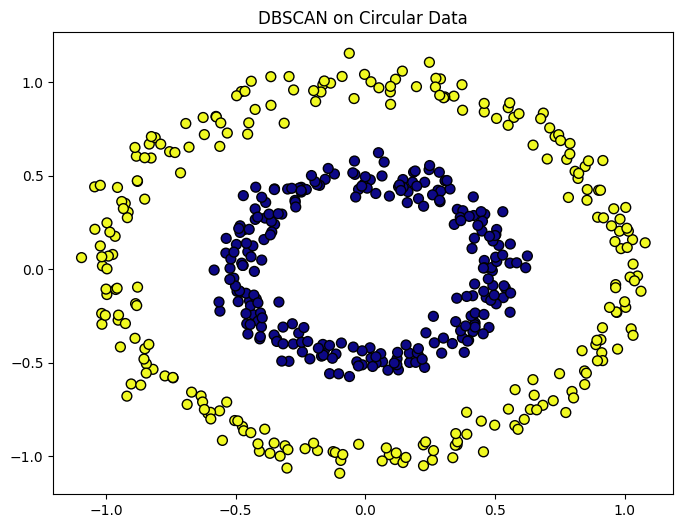

In [6]:
from sklearn.datasets import make_circles
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# Generate circular synthetic data
X, _ = make_circles(n_samples=500, factor=0.5, noise=0.05, random_state=42)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.2, min_samples=5)
labels = dbscan.fit_predict(X)

# Plot result
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='plasma', edgecolor='k', s=50)
plt.title("DBSCAN on Circular Data")
plt.show()


 6. Load the Breast Cancer dataset, apply MinMaxScaler, and use K-Means with 2 clusters. Output the cluster centroids

In [7]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

# Load dataset
data = load_breast_cancer()
X = data.data

# Apply MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-Means with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_scaled)

# Print centroids
print("Cluster centroids (scaled features):")
print(kmeans.cluster_centers_)


Cluster centroids (scaled features):
[[0.50483563 0.39560329 0.50578661 0.36376576 0.46988732 0.42226302
  0.41838662 0.46928035 0.45899738 0.29945886 0.19093085 0.19112073
  0.17903433 0.13086432 0.18017962 0.25890126 0.12542475 0.30942779
  0.190072   0.13266975 0.48047448 0.45107371 0.4655302  0.31460597
  0.49868817 0.36391461 0.39027292 0.65827197 0.33752296 0.26041387]
 [0.25535358 0.28833455 0.24696416 0.14388369 0.35743076 0.18019471
  0.10344776 0.1306603  0.34011829 0.25591606 0.06427485 0.18843043
  0.05975663 0.02870108 0.18158628 0.13242941 0.05821528 0.18069336
  0.17221057 0.08403996 0.2052406  0.32069002 0.19242138 0.09943446
  0.3571115  0.14873935 0.13142287 0.26231363 0.22639412 0.15437354]]


7. Generate synthetic data using make_blobs with varying cluster standard deviations and cluster with DBSCAN

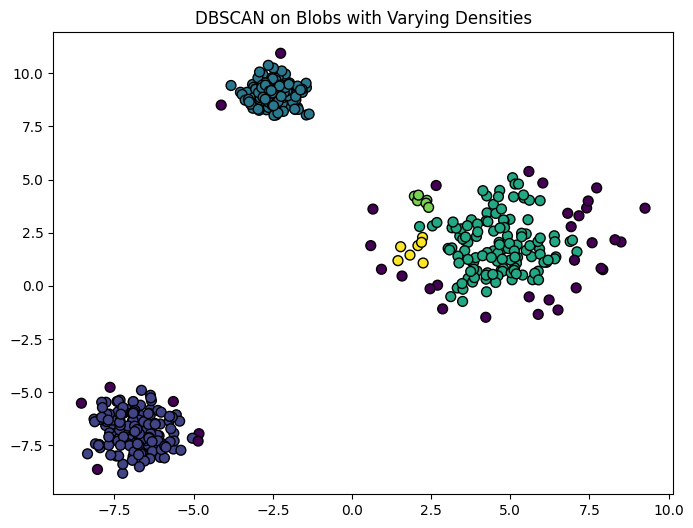

In [8]:
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# Generate blobs with varying cluster stds
X, _ = make_blobs(n_samples=500, centers=3, cluster_std=[0.5, 1.5, 0.8], random_state=42)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.6, min_samples=5)
labels = dbscan.fit_predict(X)

# Plot result
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', edgecolor='k', s=50)
plt.title("DBSCAN on Blobs with Varying Densities")
plt.show()


8. Load the Digits dataset, reduce it to 2D using PCA, and visualize clusters from K-Means

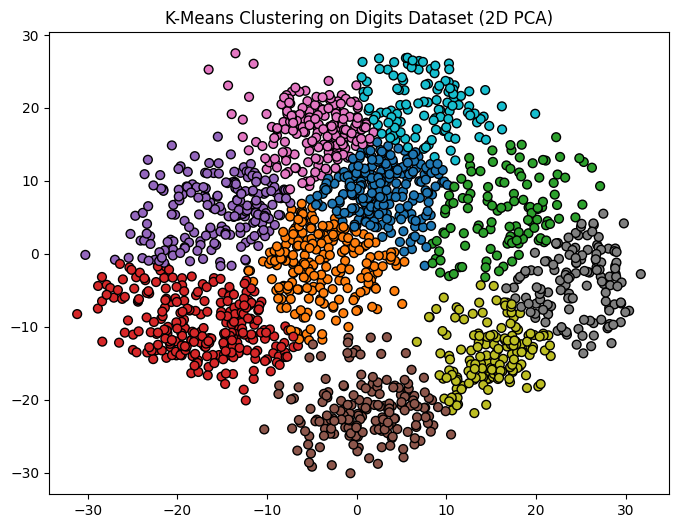

In [9]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load Digits dataset
digits = load_digits()
X = digits.data

# Reduce to 2D using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Apply K-Means
kmeans = KMeans(n_clusters=10, random_state=42)
labels = kmeans.fit_predict(X_pca)

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='tab10', edgecolor='k', s=40)
plt.title("K-Means Clustering on Digits Dataset (2D PCA)")
plt.show()


 9. Create synthetic data using make_blobs and evaluate silhouette scores for k = 2 to 5. Display as a bar chart

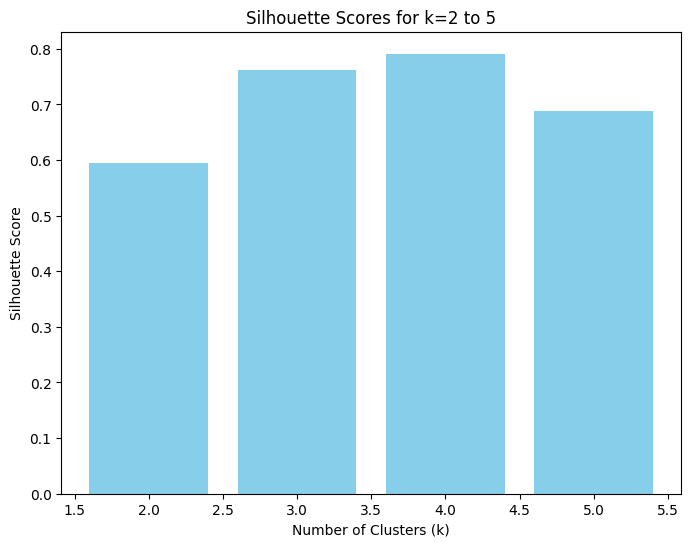

In [10]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Generate synthetic data
X, _ = make_blobs(n_samples=500, centers=4, random_state=42)

# Evaluate silhouette scores for k=2 to 5
scores = []
k_values = range(2, 6)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    scores.append(score)

# Plot
plt.figure(figsize=(8, 6))
plt.bar(k_values, scores, color='skyblue')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores for k=2 to 5")
plt.show()


10. Load the Iris dataset and use hierarchical clustering to group data. Plot a dendrogram with average linkage

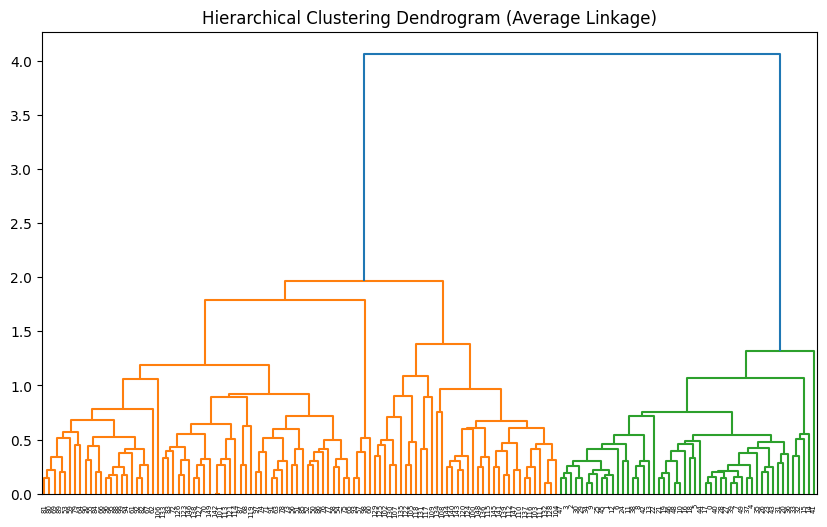

In [11]:
from sklearn.datasets import load_iris
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Load data
iris = load_iris()
X = iris.data

# Compute linkage matrix
linked = linkage(X, method='average')

# Plot dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=False)
plt.title("Hierarchical Clustering Dendrogram (Average Linkage)")
plt.show()


11. Generate synthetic data with overlapping clusters using make_blobs, then apply K-Means and visualize with decision boundaries

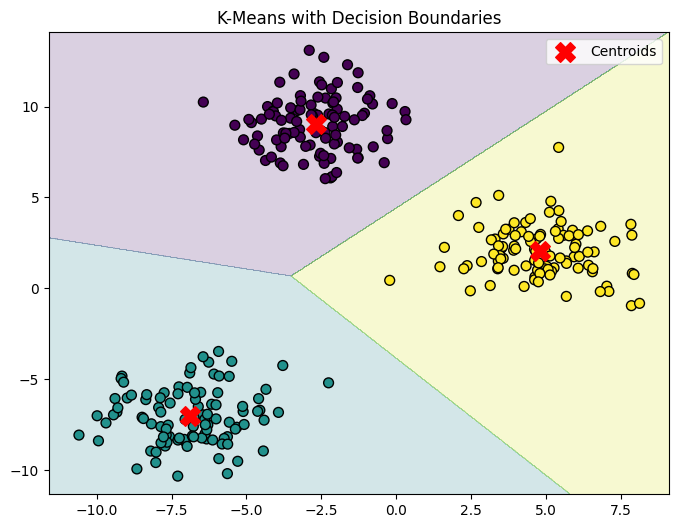

In [12]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# Generate synthetic data
X, y = make_blobs(n_samples=300, centers=3, cluster_std=1.5, random_state=42)

# Fit KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
labels = kmeans.predict(X)

# Create mesh grid
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.2, cmap='viridis')
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', edgecolor='k', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            c='red', marker='X', s=200, label='Centroids')
plt.title("K-Means with Decision Boundaries")
plt.legend()
plt.show()


 12. Load the Digits dataset and apply DBSCAN after reducing dimensions with t-SNE. Visualize the results

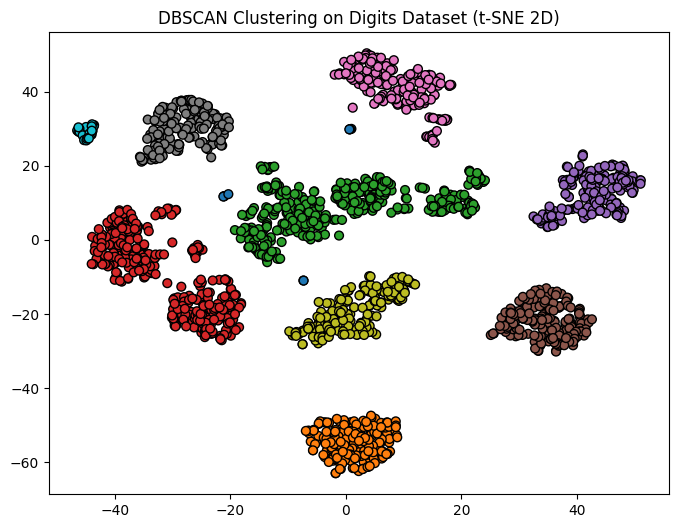

In [13]:
from sklearn.datasets import load_digits
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# Load dataset
digits = load_digits()
X = digits.data

# Reduce to 2D using t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X)

# Apply DBSCAN
dbscan = DBSCAN(eps=5, min_samples=5)
labels = dbscan.fit_predict(X_tsne)

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels, cmap='tab10', s=40, edgecolor='k')
plt.title("DBSCAN Clustering on Digits Dataset (t-SNE 2D)")
plt.show()


13. Generate synthetic data using make_blobs and apply Agglomerative Clustering with complete linkage. Plot the result

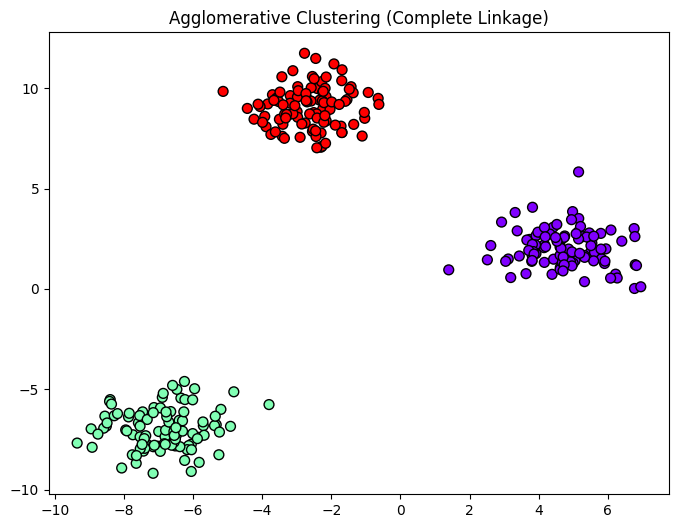

In [14]:
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# Generate data
X, _ = make_blobs(n_samples=300, centers=3, random_state=42)

# Apply Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=3, linkage='complete')
labels = agglo.fit_predict(X)

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='rainbow', edgecolor='k', s=50)
plt.title("Agglomerative Clustering (Complete Linkage)")
plt.show()


 14. Load the Breast Cancer dataset and compare inertia values for K = 2 to 6 using K-Means. Show results in a line plot

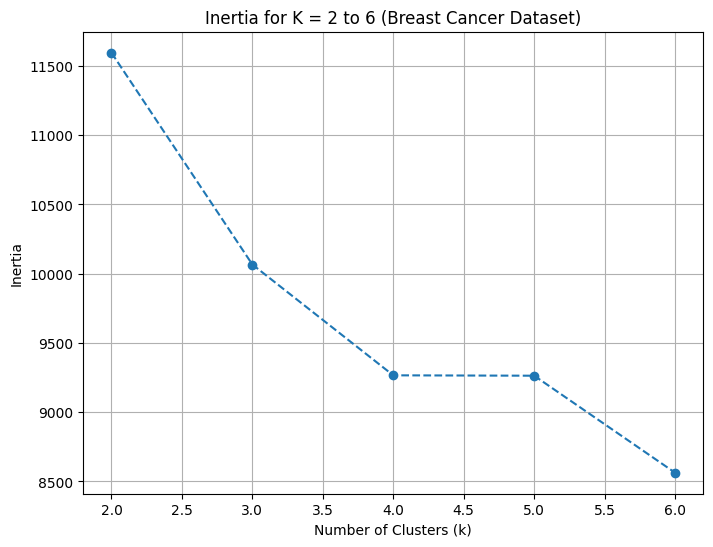

In [15]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load and scale data
data = load_breast_cancer()
X = StandardScaler().fit_transform(data.data)

# Calculate inertia for K = 2 to 6
inertias = []
k_range = range(2, 7)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(k_range, inertias, marker='o', linestyle='--')
plt.title("Inertia for K = 2 to 6 (Breast Cancer Dataset)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()


 15. Generate synthetic concentric circles using make_circles and cluster using Agglomerative Clustering with single linkage

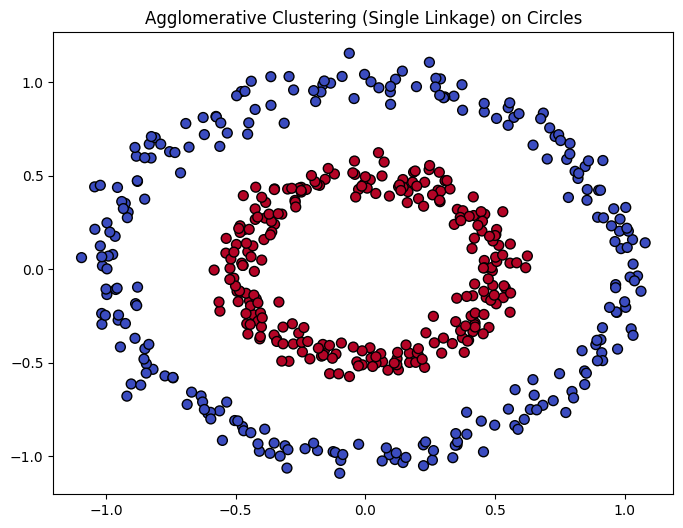

In [16]:
from sklearn.datasets import make_circles
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# Generate concentric circles
X, _ = make_circles(n_samples=500, noise=0.05, factor=0.5, random_state=42)

# Apply Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=2, linkage='single')
labels = agglo.fit_predict(X)

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='coolwarm', edgecolor='k', s=50)
plt.title("Agglomerative Clustering (Single Linkage) on Circles")
plt.show()


16. Use the Wine dataset, apply DBSCAN after scaling the data, and count the number of clusters (excluding noise)

In [17]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import numpy as np

# Load and scale data
data = load_wine()
X = StandardScaler().fit_transform(data.data)

# Apply DBSCAN
dbscan = DBSCAN(eps=1.5, min_samples=5)
labels = dbscan.fit_predict(X)

# Count number of clusters (excluding noise label -1)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print(f"Number of clusters (excluding noise): {n_clusters}")


Number of clusters (excluding noise): 0


17. Generate synthetic data with make_blobs and apply KMeans. Then plot the cluster centers on top of the data points

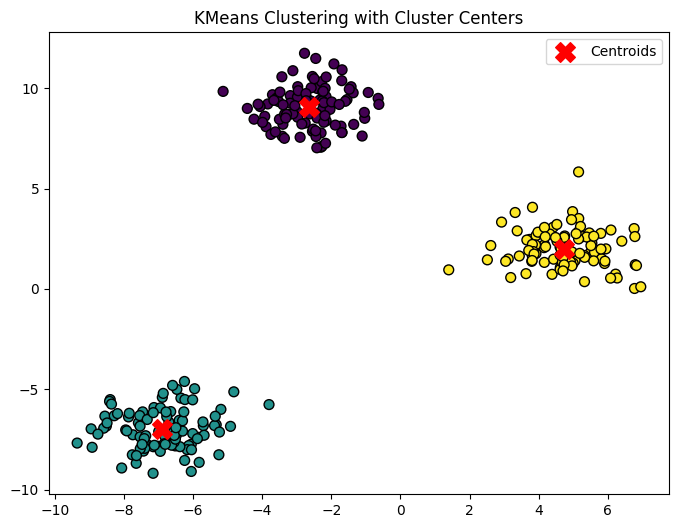

In [18]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Generate synthetic data
X, _ = make_blobs(n_samples=300, centers=3, random_state=42)

# Apply KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X)
centers = kmeans.cluster_centers_

# Plot data and centers
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', edgecolor='k', s=50)
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title("KMeans Clustering with Cluster Centers")
plt.legend()
plt.show()


 18. Load the Iris dataset, cluster with DBSCAN, and print how many samples were identified as noise

In [19]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import numpy as np

# Load and scale data
data = load_iris()
X = StandardScaler().fit_transform(data.data)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.8, min_samples=5)
labels = dbscan.fit_predict(X)

# Count noise samples
n_noise = np.sum(labels == -1)
print(f"Number of noise samples: {n_noise}")


Number of noise samples: 4


 19. Generate synthetic non-linearly separable data using make_moons, apply K-Means, and visualize the clustering result

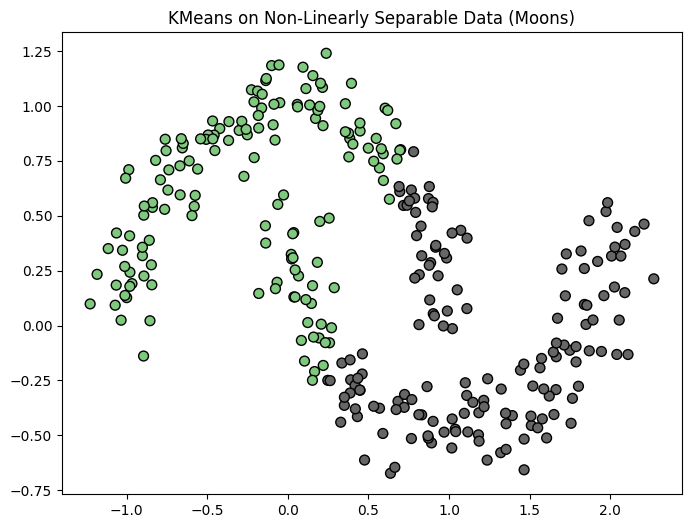

In [20]:
from sklearn.datasets import make_moons
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Generate non-linear moon-shaped data
X, _ = make_moons(n_samples=300, noise=0.1, random_state=42)

# Apply KMeans
kmeans = KMeans(n_clusters=2, random_state=42)
labels = kmeans.fit_predict(X)

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='Accent', edgecolor='k', s=50)
plt.title("KMeans on Non-Linearly Separable Data (Moons)")
plt.show()


 20. Load the Digits dataset, apply PCA to reduce to 3 components, then use KMeans and visualize with a 3D scatter plot

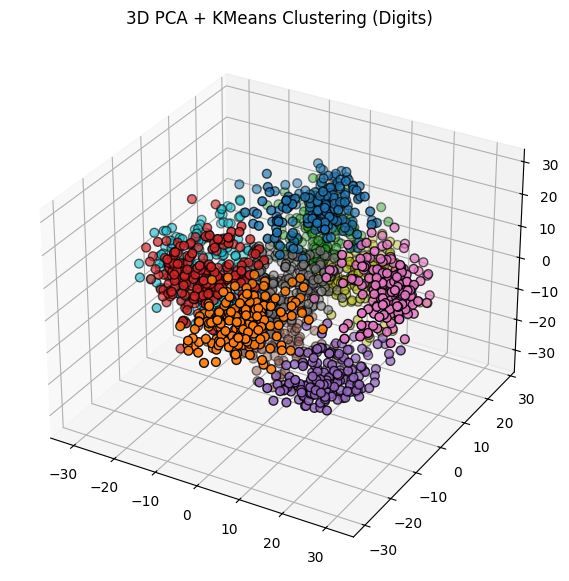

In [21]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load dataset
digits = load_digits()
X = digits.data

# Reduce to 3D with PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

# Apply KMeans
kmeans = KMeans(n_clusters=10, random_state=42)
labels = kmeans.fit_predict(X_pca)

# 3D plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=labels, cmap='tab10', s=40, edgecolor='k')
ax.set_title("3D PCA + KMeans Clustering (Digits)")
plt.show()


21. Generate synthetic blobs with 5 centers and apply KMeans. Then use silhouette_score to evaluate the clustering

In [23]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Generate data
X, _ = make_blobs(n_samples=500, centers=5, random_state=42)

# Apply KMeans
kmeans = KMeans(n_clusters=5, random_state=42)
labels = kmeans.fit_predict(X)

# Evaluate with silhouette score
score = silhouette_score(X, labels)
print(f"Silhouette Score: {score:.4f}")


Silhouette Score: 0.6787


22. Load the Breast Cancer dataset, reduce dimensionality using PCA, and apply Agglomerative Clustering. Visualize in 2D

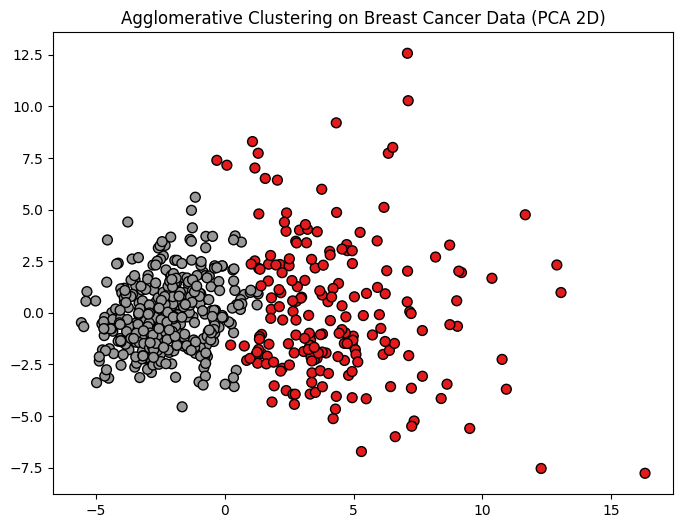

In [24]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# Load and scale data
data = load_breast_cancer()
X = StandardScaler().fit_transform(data.data)

# PCA to 2D
X_pca = PCA(n_components=2).fit_transform(X)

# Apply Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=2)
labels = agglo.fit_predict(X_pca)

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='Set1', edgecolor='k', s=50)
plt.title("Agglomerative Clustering on Breast Cancer Data (PCA 2D)")
plt.show()


23. Generate noisy circular data using make_circles and visualize clustering results from KMeans and DBSCAN side-by-side

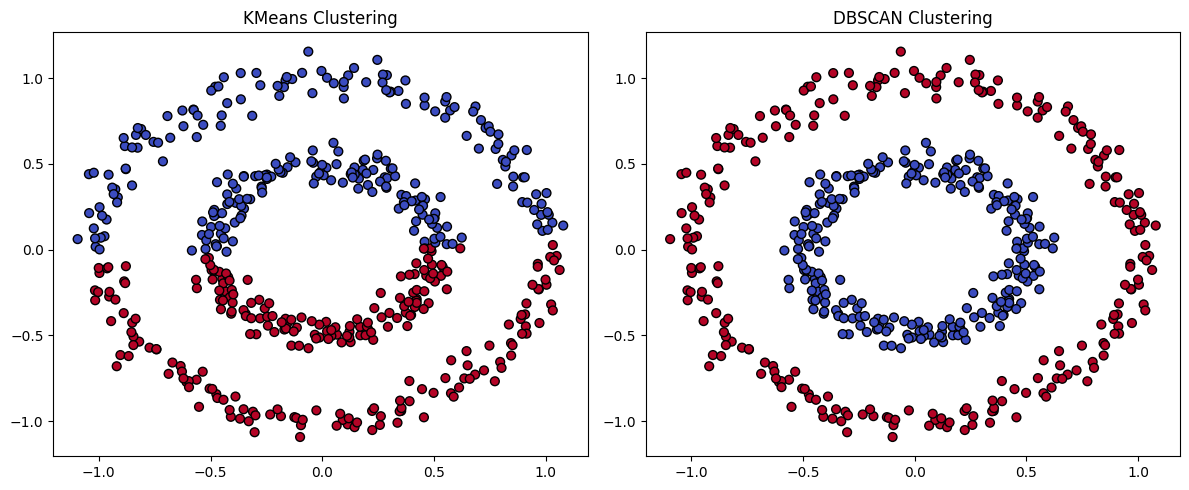

In [25]:
from sklearn.datasets import make_circles
from sklearn.cluster import KMeans, DBSCAN
import matplotlib.pyplot as plt

# Generate data
X, _ = make_circles(n_samples=500, noise=0.05, factor=0.5, random_state=42)

# Apply KMeans
kmeans_labels = KMeans(n_clusters=2, random_state=42).fit_predict(X)

# Apply DBSCAN
dbscan_labels = DBSCAN(eps=0.2, min_samples=5).fit_predict(X)

# Plot side-by-side
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
axs[0].scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap='coolwarm', edgecolor='k', s=40)
axs[0].set_title("KMeans Clustering")
axs[1].scatter(X[:, 0], X[:, 1], c=dbscan_labels, cmap='coolwarm', edgecolor='k', s=40)
axs[1].set_title("DBSCAN Clustering")
plt.tight_layout()
plt.show()


24. Load the Iris dataset and plot the Silhouette Coefficient for each sample after KMeans clustering

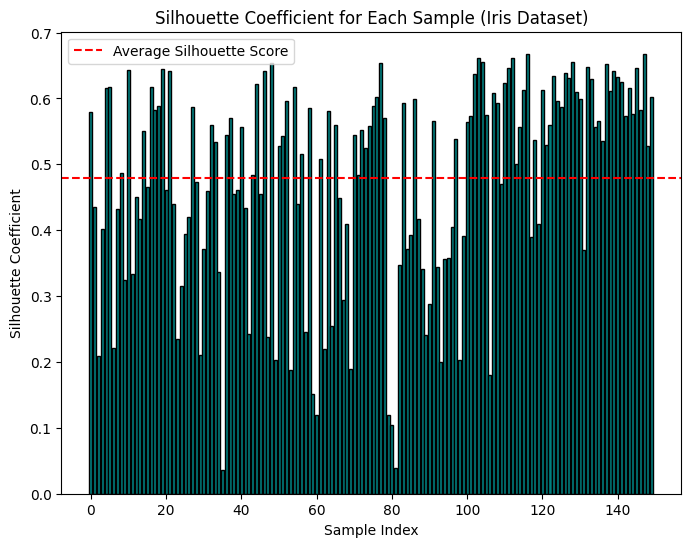

In [26]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
import matplotlib.pyplot as plt
import numpy as np

# Load and scale data
iris = load_iris()
X = StandardScaler().fit_transform(iris.data)

# Apply KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X)

# Compute silhouette scores
silhouette_vals = silhouette_samples(X, labels)

# Plot
plt.figure(figsize=(8, 6))
plt.bar(range(len(silhouette_vals)), silhouette_vals, color='teal', edgecolor='k')
plt.axhline(y=np.mean(silhouette_vals), color='red', linestyle='--', label='Average Silhouette Score')
plt.title("Silhouette Coefficient for Each Sample (Iris Dataset)")
plt.xlabel("Sample Index")
plt.ylabel("Silhouette Coefficient")
plt.legend()
plt.show()


25. Generate synthetic data using make_blobs and apply Agglomerative Clustering with 'average' linkage. Visualize clusters

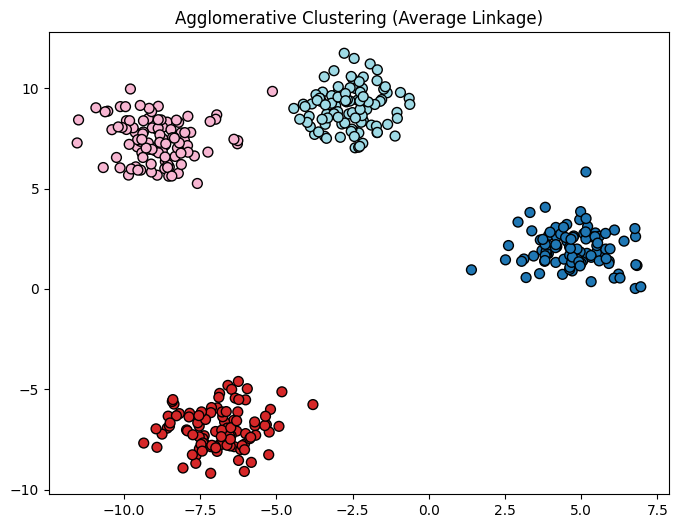

In [27]:
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# Generate data
X, _ = make_blobs(n_samples=400, centers=4, random_state=42)

# Apply Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=4, linkage='average')
labels = agglo.fit_predict(X)

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='tab20', edgecolor='k', s=50)
plt.title("Agglomerative Clustering (Average Linkage)")
plt.show()


 26. Load the Wine dataset, apply KMeans, and visualize the cluster assignments in a seaborn pairplot (first 4 features)

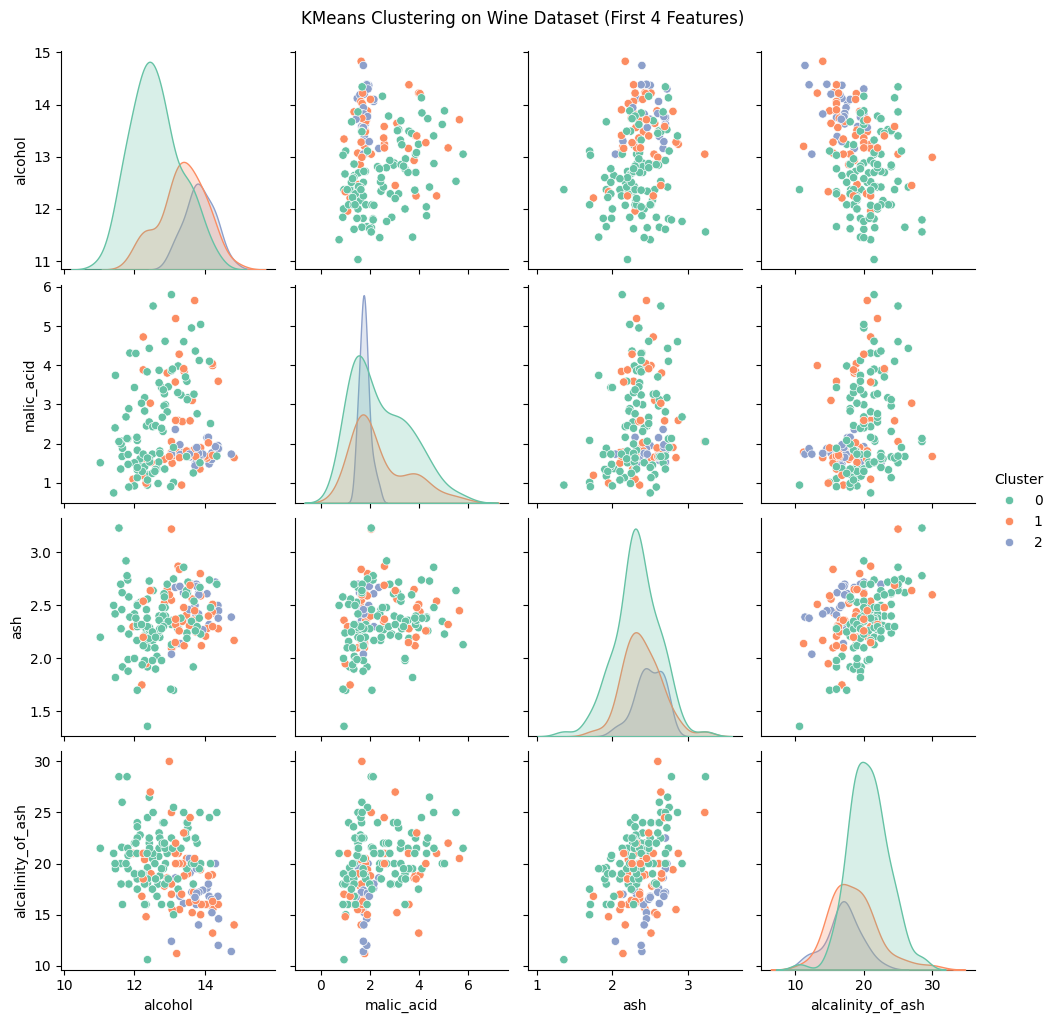

In [28]:
import seaborn as sns
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.cluster import KMeans

# Load data
data = load_wine()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Cluster'] = KMeans(n_clusters=3, random_state=42).fit_predict(data.data)

# Pairplot (first 4 features)
sns.pairplot(df.iloc[:, :4].join(df['Cluster']), hue="Cluster", palette='Set2')
plt.suptitle("KMeans Clustering on Wine Dataset (First 4 Features)", y=1.02)
plt.show()


 27. Generate noisy blobs using make_blobs and use DBSCAN to identify both clusters and noise points. Print the count

In [29]:
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
import numpy as np

# Generate noisy blobs
X, _ = make_blobs(n_samples=400, centers=3, cluster_std=1.0, random_state=42)

# Apply DBSCAN
dbscan = DBSCAN(eps=1.0, min_samples=5)
labels = dbscan.fit_predict(X)

# Count clusters and noise
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = np.sum(labels == -1)

print(f"Number of clusters: {n_clusters}")
print(f"Number of noise points: {n_noise}")


Number of clusters: 3
Number of noise points: 6


28. Load the Digits dataset, reduce dimensions using t-SNE, then apply Agglomerative Clustering and plot the clusters


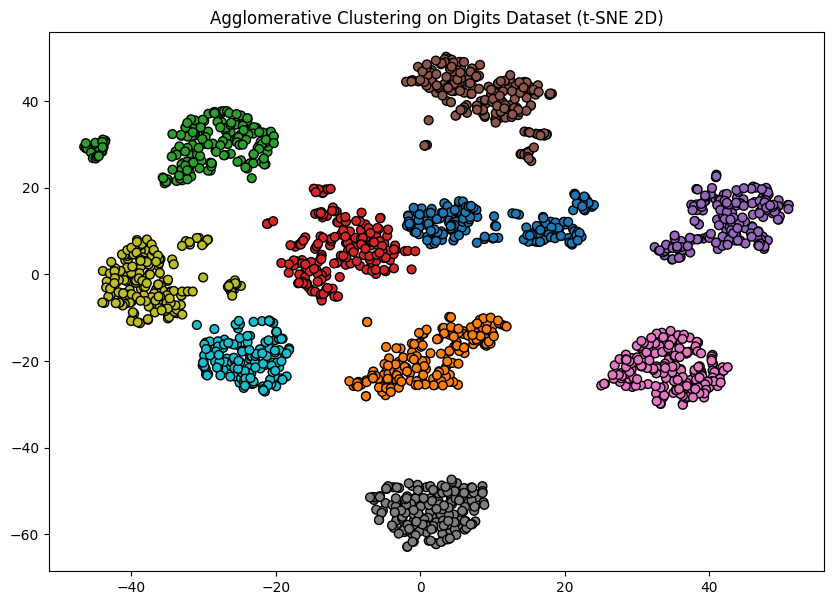

In [30]:
from sklearn.datasets import load_digits
from sklearn.manifold import TSNE
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# Load Digits dataset
digits = load_digits()
X = digits.data

# Reduce to 2D using t-SNE
X_tsne = TSNE(n_components=2, random_state=42, perplexity=30).fit_transform(X)

# Apply Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=10)
labels = agglo.fit_predict(X_tsne)

# Plot
plt.figure(figsize=(10, 7))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels, cmap='tab10', s=40, edgecolor='k')
plt.title("Agglomerative Clustering on Digits Dataset (t-SNE 2D)")
plt.show()
